In [38]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [39]:
h5_file = "test_file.h5"

Reading test_file.h5


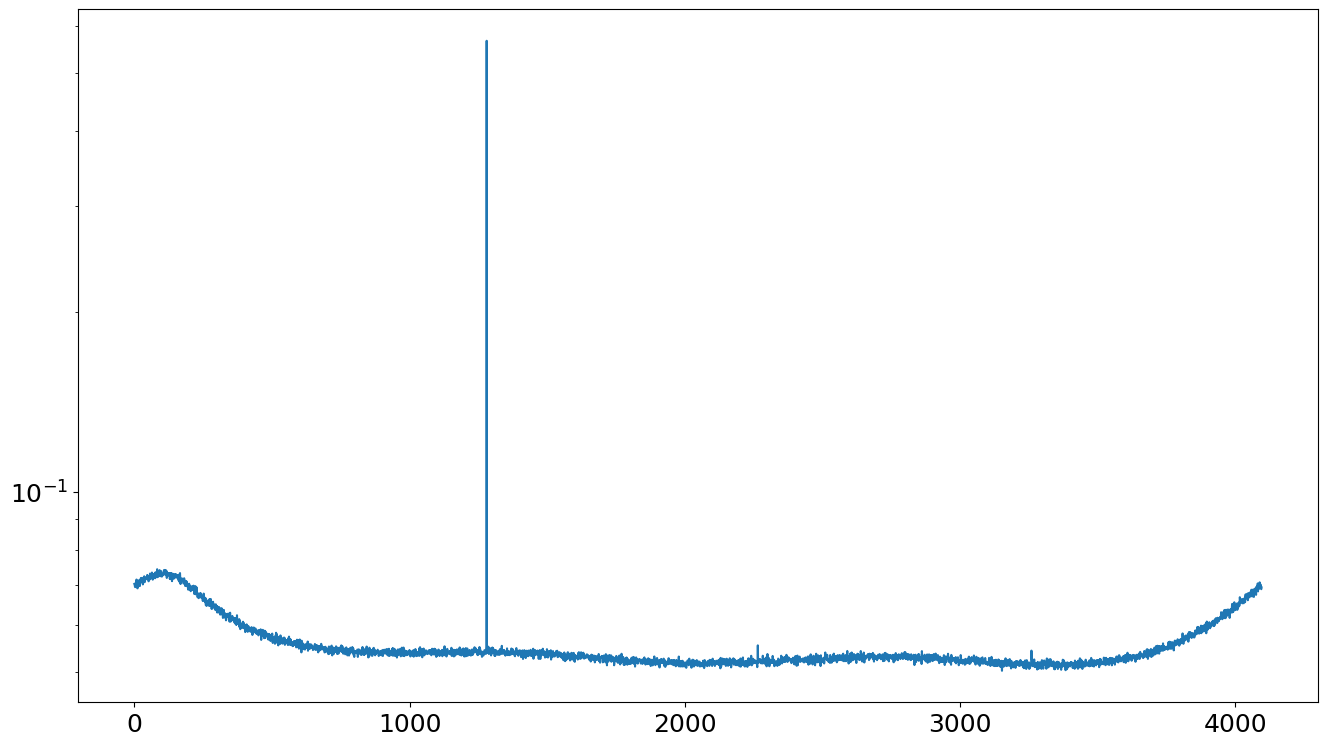

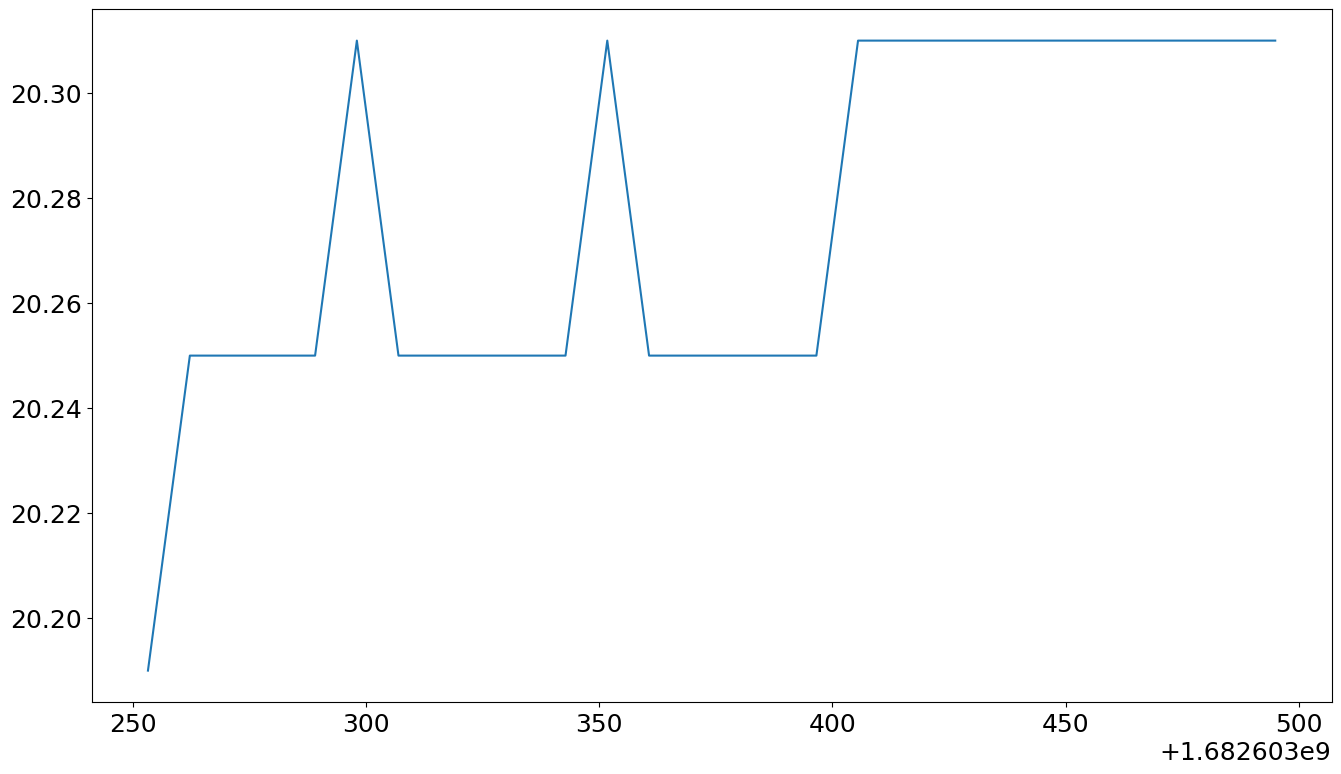

In [40]:
print ("Reading",h5_file)
hf = h5py.File(h5_file, 'r')

len_data = hf["data/timestamps"][()].shape[0]
len_cal_data = int(len_data/3)-1

ant_index  = np.where(hf["data/obssource"][()]==0)[0][0:len_cal_data]
cold_index = np.where(hf["data/obssource"][()]==1)[0][0:len_cal_data]
hot_index  = np.where(hf["data/obssource"][()]==2)[0][0:len_cal_data]

ant_data = hf["data/radio"][()][ant_index, :]
cold_data = hf["data/radio"][()][cold_index, :]
hot_data = hf["data/radio"][()][hot_index, :]
temperature = hf["data/temperature"][()][ant_index]
ant_tstamps = hf["data/timestamps"][()][ant_index]
hf.close()

ant_calibrated = ant_data/(hot_data - cold_data)
mean_power = np.mean(ant_calibrated, axis=1)
mean_spectrum = np.mean(ant_calibrated, axis=0)

plt.figure(figsize=(16,9))
plt.semilogy(mean_spectrum)

# plt.figure(figsize=(16,9))
# plt.semilogy(ant_data.T)
# plt.semilogy(hot_data.T)
# plt.semilogy(cold_data.T)

# plt.figure(figsize=(16,9))
# plt.plot(ant_tstamps, mean_power)

plt.figure(figsize=(16,9))
plt.plot(ant_tstamps, temperature)
